In [70]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import time

In [71]:
def add_layer(inputs,in_size,out_size,activation_function=None):
    Weights=tf.Variable(tf.random_normal([in_size,out_size])) #tf.random_normal[row,col]
    biases=tf.Variable(tf.zeros([1,out_size])+0.1)
    Wx_plus_b=tf.matmul(inputs,Weights)+biases
    if activation_function is None:
        outputs=Wx_plus_b
    else:
        outputs=activation_function(Wx_plus_b)
    return outputs

In [72]:
x_data=np.linspace(-1,1,300)[:,np.newaxis] #-1~1間300個點，x_data有300個row和1個coloumn
noise=np.random.normal(0,0.05,x_data.shape)#random 0~0.05的數 300row和1個coloumn
y_data=np.square(x_data)-0.5+noise

In [73]:
xs=tf.placeholder(tf.float32,[None,1])
ys=tf.placeholder(tf.float32,[None,1])


In [74]:
l1=add_layer(xs,1,10,activation_function=tf.nn.relu)
prediction=add_layer(l1,10,1,activation_function=None)
loss=tf.reduce_mean(tf.reduce_sum(tf.square(ys-prediction),reduction_indices=[1]))

In [75]:
train_step=tf.train.GradientDescentOptimizer(0.1).minimize(loss)

In [76]:
init=tf.initialize_all_variables()
sess=tf.Session()
sess.run(init)

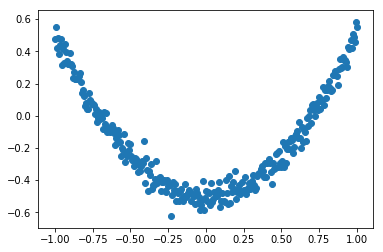

In [77]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.scatter(x_data,y_data)
plt.show()

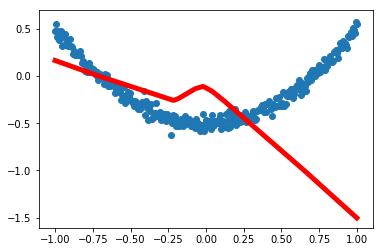

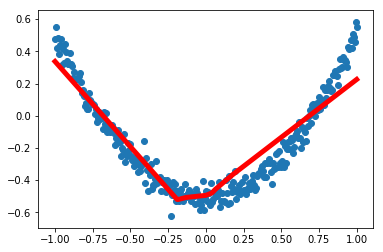

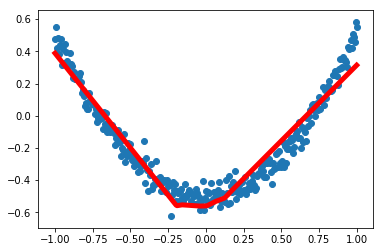

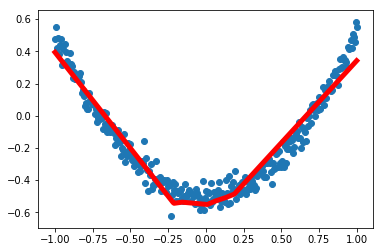

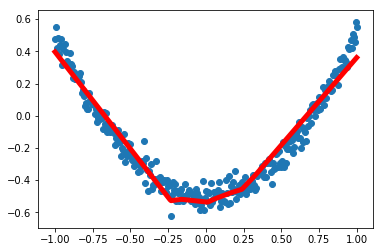

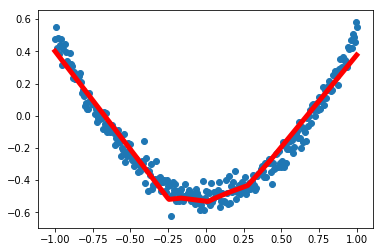

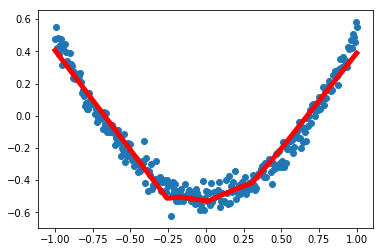

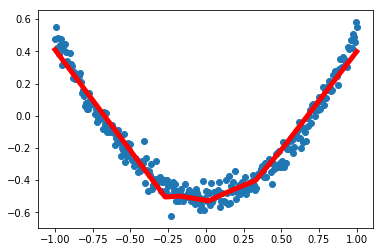

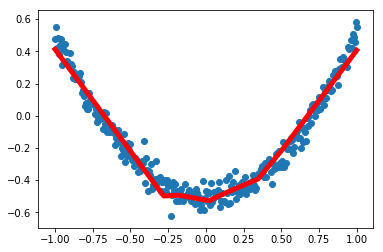

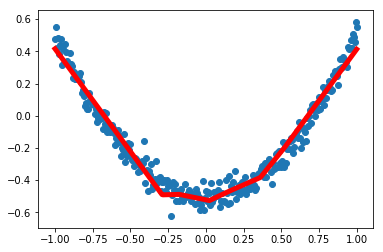

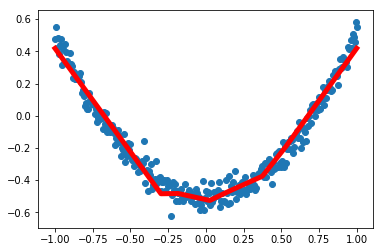

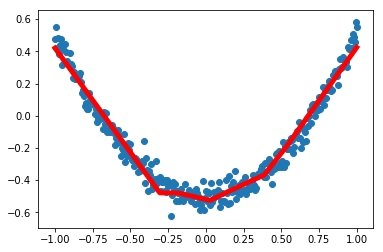

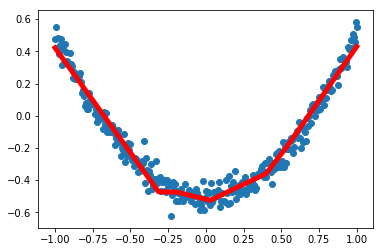

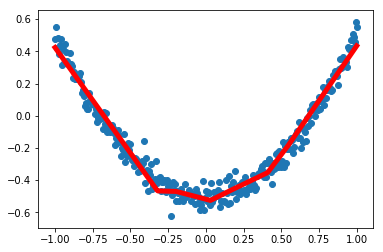

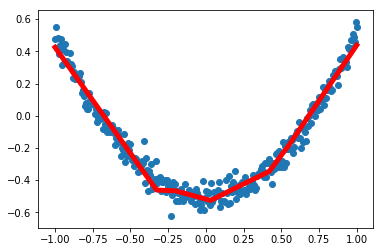

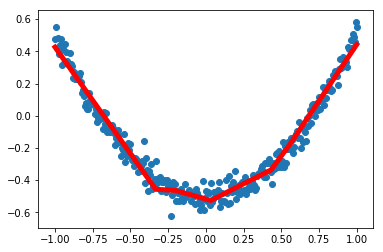

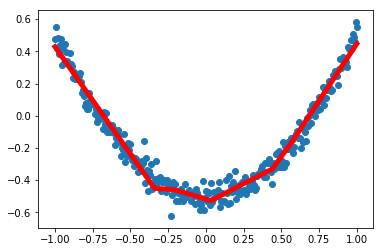

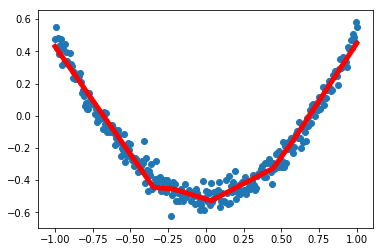

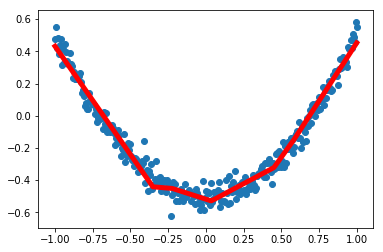

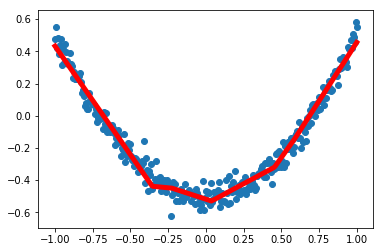

In [78]:
for i in range(1000):
    sess.run(train_step,feed_dict={xs:x_data,ys:y_data})
    if i % 50==0:
#       print(i,sess.run(loss,feed_dict={xs:x_data,ys:y_data}))
   
     
        plt.cla()
        plt.scatter(x_data, y_data)
        prediction_value=sess.run(prediction,feed_dict={xs:x_data})
        lines=plt.plot(x_data,prediction_value,'r-',lw=5)

        plt.pause(0.1)